# Human Activity Recognition

### The dataset our human activity recognition model was trained on is the Kinetics 400 Dataset.

##### This dataset consists of:

400 human activity recognition classes

At least 400 video clips per class (downloaded via YouTube)

A total of 300,000 videos

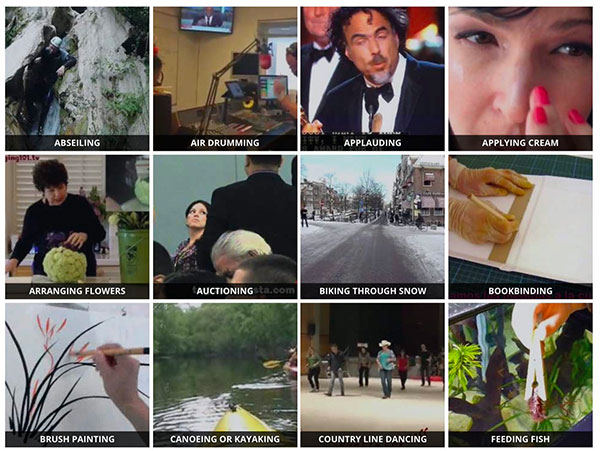

## 3D ResNet for Human Activity Recognition

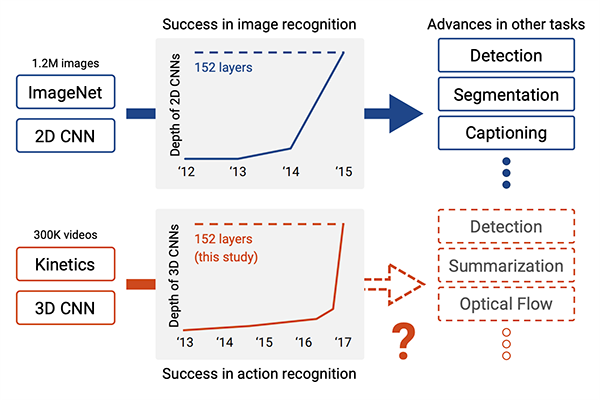


### Import these libraries

In [1]:
import numpy as np
import imutils
import sys
import cv2

#### Load the contents of the class labels file, then define the sample duration and sample size

In [ ]:
CLASSES = open('Your path/action_recognition_kinetics.txt').read().strip().split("\n") # Specify the label Path
SAMPLE_DURATION = 16
SAMPLE_SIZE = 112

#### Load the human activity recognition model

In [14]:
net = cv2.dnn.readNet('Your path/resnet-34_kinetics.onnx') # Specify the Model Path
print("[INFO] loading human activity recognition model...")

[INFO] loading human activity recognition model...


#### Your input video goes here: Specify the path of the input Video 

In [15]:
vs = cv2.VideoCapture('Your path/activities.mp4') # Your Input Video Path
print("[INFO] accessing video stream...")

[INFO] accessing video stream...


## This code block performs the activity recognition

In [ ]:
while True:
    # initialize the batch of frames that will be passed through the model
    frames = []

    # loop over the number of required sample frames
    for i in range(0, SAMPLE_DURATION):
        # read a frame from the video stream
        (grabbed, frame) = vs.read()

        # if the frame was not grabbed then we've reached the end of the video stream so exit the script
        if not grabbed:
            print("[INFO] no frame read from stream - exiting")
            sys.exit(0)

        # otherwise, the frame was read so resize it and add it to our frames list
        frame = imutils.resize(frame, width=400)
        frames.append(frame)

    # now that our frames array is filled we can construct our blob
    blob = cv2.dnn.blobFromImages(frames, 1.0,
        (SAMPLE_SIZE, SAMPLE_SIZE), (114.7748, 107.7354, 99.4750),
        swapRB=True, crop=True)
    blob = np.transpose(blob, (1, 0, 2, 3))
    blob = np.expand_dims(blob, axis=0)

    # pass the blob through the network to obtain our human activity recognition predictions
    net.setInput(blob)
    outputs = net.forward()
    label = CLASSES[np.argmax(outputs)]

    # loop over our frames
    for frame in frames:
        # draw the predicted activity on the frame
        cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
        cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255, 255, 255), 2)

        # display the frame to our screen
        cv2.imshow("Activity Recognition", frame)
        key = cv2.waitKey(1) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

## Press q to quit 

# Try with different custom videos